# ***This project aims to compare regression analysis with regularization (Ridge Regression) and without regularization (OLS Linear Regression).***
# **OLS Linear Regression vs. Ridge Regression**

## **Task**: Predicting House Prices

<font size="4">1. Let's start by **importing** the following **Python libraries** using the Python's import statement in the following Python code snippet:
   - Numpy (https://numpy.org/)
   - Pandas (https://pandas.pydata.org/)
   - Matplotlib (https://matplotlib.org/)
   - Seaborn (https://seaborn.pydata.org/)
   - Sklearn (https://scikit-learn.org/stable/)
   
```%matplotlib inline``` is a magic command for IPython and Jupyter notebooks that enables the inline display of matplotlib plot outputs directly beneath the code cells that produce them in a Jupyter notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Notice that after calling the top-level ***package*** name, specific ***submodules*** are sometimes specified (e.g., ```preprocessing```) as needed, as well as ***classes*** or ***functions*** we want to import from the specified module (e.g., ```StandardScaler``` and ```OneHotEncoder```)

<font size="4">2. **Read the comma-separated values (CSV) housing price ```train.csv``` dataset into a Pandas DataFrame**, utilizing the Pandas library (pd being the conventional shorthand for Pandas once imported). 

This data was obtained from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```tr_path``` contains a string value that represents the file path to the training dataset ```train.csv```, indicating the location of the file on the computer's filesystem. 

```data = pd.read_csv(tr_path)``` uses the read_csv() function from the Pandas library (pd) to read the CSV file specified by the file path tr_path into a Pandas DataFrame.

In [2]:
tr_path = './train.csv'
data = pd.read_csv(tr_path)

<font size="4">3. Let's **see a few rows of the DataFrame** data. By default, ```head()``` returns the first five rows, but you can specify a different number of rows by passing an integer as an argument to the method. For example, ```data.head(10)``` would return the first ten rows of the data DataFrame.

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<font size="4">4. Next, let's **print a concise summary of the DataFrame data**, including the total number of entries (observations) in the DataFrame, the number of features (variables), a list of all column names, along with the number of non-null (non-missing) entries in each column, the data type of each column (e.g., integer, float, object (typically strings or mixed types), datetime, etc.) and the total amount of memory used by the DataFrame. Notice that in Python the index of the first element for rows and columns is 0. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font size="4">5. Next, let's **detect missing values** (NA or NaN) within the DataFrame on each column.

For this task, we can use either method ```data.isna().sum()``` or ```data.isnull().sum()```. Both methods are functionally identical. They return a boolean DataFrame where ```True``` represents the presence of a missing value and ```False``` indicates a non-missing value. When we chain the ```.sum()``` method after isnull() or isna(), it counts the number of True values (i.e., missing values) in each column, effectively giving you the total number of missing values per column in the DataFrame. Columns without missing values are coded as 0.

In [5]:
missing_data_summary = data.isnull().sum()
missing_data_summary

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<font size="4">6. **Filter out and retain only those columns with missing data** within missing_data_summary (i.e, with a value greater than 0). Print the number of missing values on each column.

In [6]:
missing_data_only = missing_data_summary[missing_data_summary > 0]
missing_data_only

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<font size="4">7. **Check how many rows in the entire data have no missing values**. 

By default, ```data.dropna()``` removes rows where any column has an NaN value. This method could lead to the removal of a significant portion of your data, especially in datasets where missing values are common across different variables. If your dataset has widespread missing values across many columns, using data.dropna() without additional parameters could result in an empty DataFrame. In this case, every row in this dataset has at least one NaN value in one of the columns. So, there are no rows in this dataset that are completely free of missing values across all 81 columns. The built-in function ```len()```, returns the length (the number of rows) of the ```cleaned_data``` object. 

In [7]:
cleaned_data = data.dropna()
num_rows_without_missing_values = len(cleaned_data)
print(f"Number of rows without missing values: {num_rows_without_missing_values}")

Number of rows without missing values: 0


<font size="4">8. Next, let's proceed with some **visualizations** for some of the variables.

   - **Histogram** of Sale House Prices in dollars (our **target variable** to predict)

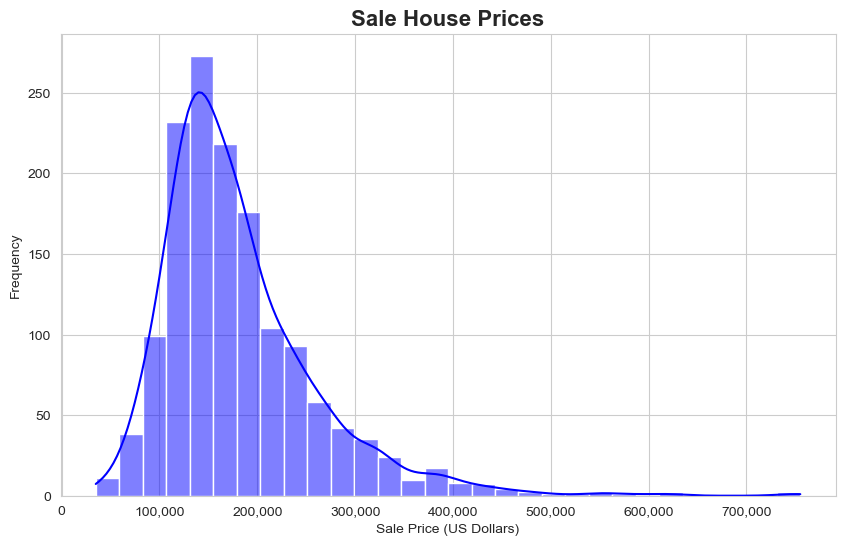

In [8]:
import warnings
# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Set the aesthetic style of the plot. The argument "whitegrid" applies a specific theme that has a white background with gridlines.
sns.set_style("whitegrid")
# Sets up the plotting area for the subsequent plot by creating a figure that is 10 inches wide and 6 inches tall.
plt.figure(figsize=(10, 6))
# Create a histogram (with blue bars and 30 bins) with a Kernel Density Estimate (KDE) overlay for the 'SalePrice' data, 
#   all styled with a white background and gridlines for improved readability and aesthetics.
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Sale House Prices', fontweight='bold', fontsize=16)  # Increase the font size of the title and make it bold
plt.xlabel('Sale Price (US Dollars)')
plt.ylabel('Frequency')
# Format the x-axis labels to include commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

From this histogram, we can infer that most of the houses in the dataset are in the lower to mid-price ranges, with fewer houses in the higher price ranges, as indicated by the long tail to the right. The smooth line that overlays the histogram bars is a Kernel Density Estimate (KDE) curve for the sale price variable. The peak of the KDE curve corresponds to the mode of the distribution, which is around the \\$150,000 to \\$200,000 price range.

- **Heatmap Visualization of a Correlation Matrix** for numerical columns (of types int64 and float64) in the DataFrame data.

The color scheme ranges from blue to red. Strong positive correlations are indicated by red shades, while strong negative correlations are shown in blue. Values close to zero, indicating little or no linear relationship, are in white.

The variables on the x-axis and y-axis are the same, and each cell in the grid shows the correlation between the variables intersecting at that point. For example, "TotalBsmtSF" (Total Basement Square Feet) and "1stFlrSF" (First Floor Square Feet) have a dark red square between them, suggesting a strong positive correlation between them, meaning as one increases, the other one tends to do it as well.

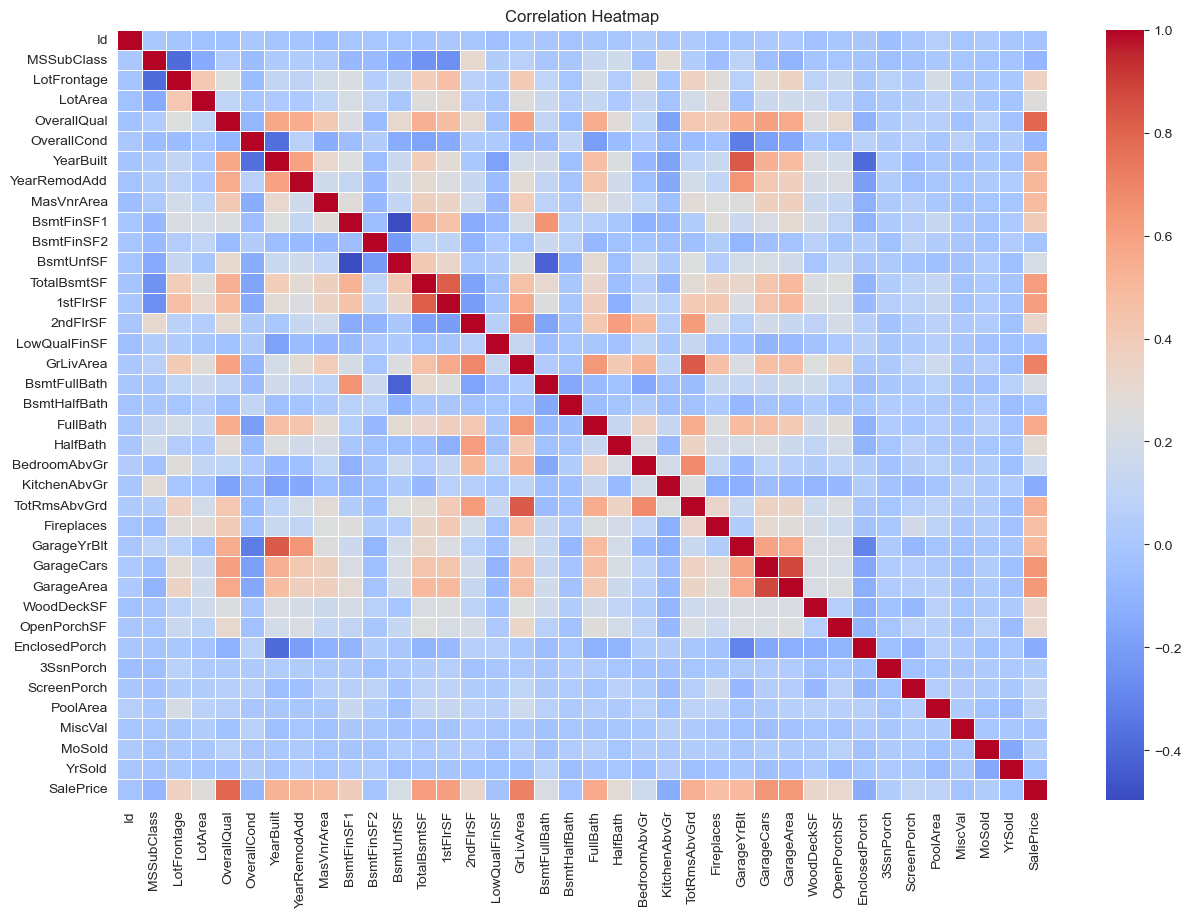

In [9]:
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Looking at the bottom row, which correlates all variables with "SalePrice", we can see which features have a stronger relationship with the sale price of houses. Variables that show a darker red in this row, such as "OverallQual" (Overall Quality), "GrLivArea" (Above grade (ground) living area square feet), and "GarageCars" (Size of garage in car capacity), appear to have a stronger positive correlation with "SalePrice". Considering the strong correlation between "SalesPrice" and "OverallQual" let's take a look at the Sale Price by Overall Quality using boxplots.

- **Boxplot** of Sale House Prices by Overall Quality of a House

The overall quality of a house is assessed based on factors such as the materials used and the overall finish of the house. It ranges from 1 to 10, being 1 low quality and 10 high quality.

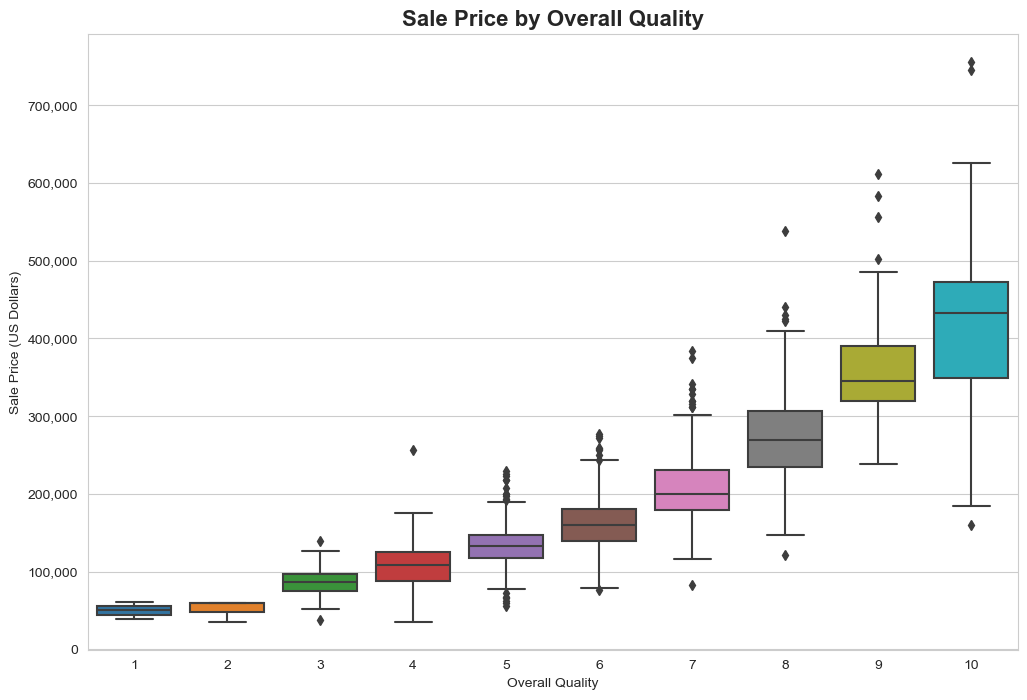

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Sale Price by Overall Quality', fontweight='bold', fontsize=16)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price (US Dollars)')
# Format the y-axis labels to include commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

This boxplot visualization, we can infer that generally, as the overall quality rating increases, the median sale price also increases. The spread of the sale prices increases with the quality rating. Higher quality houses (ratings 7 and above) show more variability in sale prices compared to lower quality houses. The most expensive houses (highest sale prices) are associated with the highest quality ratings, but with some outliers in quality ratings 8 and 9 as well. Lower quality ratings (1 to 3) have fewer data points, as indicated by the shorter range of whiskers and fewer outliers, suggesting that there are fewer houses with these low-quality ratings in the dataset.

- **Scatter Plot** of Sales Price versus Above Grade (ground) Living Area (in square feet)

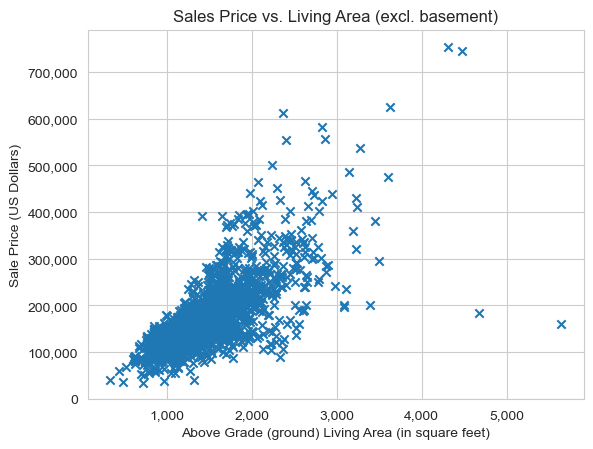

In [11]:
Y = data['SalePrice']
X = data['GrLivArea']
plt.scatter(X, Y, marker = "x")
### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("Above Grade (ground) Living Area (in square feet)")
plt.ylabel("Sale Price (US Dollars)")
# Format the x-axis labels to include commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
# Format the y-axis labels to include commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

This scatter plot visualizes the relationship between the sales price of houses and their above grade (excluding basement) living area in square feet. There appears to be a positive correlation between living area and sales price. As the living area increases, the sales price tends to increase as well, which is shown by the general upward trend of the data points. Regarding the distribution of the data, we can see that most of the data points are clustered in the lower to mid-range of living areas and sales prices. There are fewer houses with large living areas and correspondingly higher sales prices. Finally, most of the houses in the dataset fall between \\$100,000 to \\$300,000 and living areas of roughly 1,000 to 2,000 square feet.

- **Scatter Plot** of Sales Price versus the Original Construction Year of a House

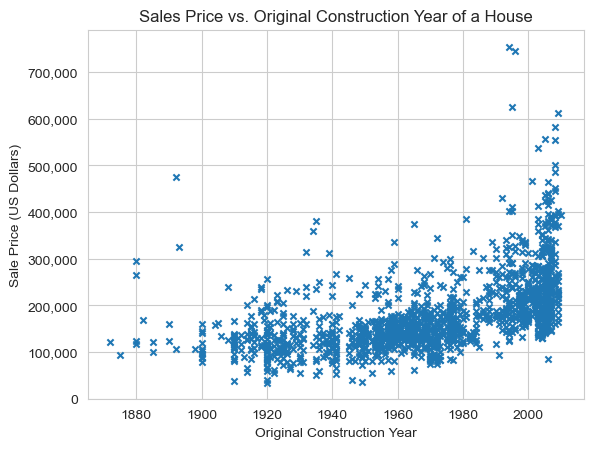

In [12]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x')
##Annotations
plt.title("Sales Price vs. Original Construction Year of a House")
plt.xlabel("Original Construction Year")
plt.ylabel("Sale Price (US Dollars)")
# Format the y-axis labels to include commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

According to this scatter plot, there is a wide dispersion of sale prices for houses built in each period. There is a visible concentration of data points for houses constructed from around 1940 to the late 2000s, indicating that most of the houses in this dataset were built during this period. Regarding sale price trends, it does not appear to be a clear or strong trend between the construction year and sale price. However, there might be a slight increase in the density of higher-priced homes in more recent years. It's notable to observe that the highest sale prices do not necessarily correspond to the newest houses. Instead, some of the highest-priced homes were built around the 1990s. Older homes (built before 1940) show a range of sale prices, but do not appear to reach as high as the most expensive homes built in more recent decades.

<font size="4">9. Next, we will train linear models using two estimators to predict Sale Price using GrLivArea and YearBuilt. However, before proceeding with model training, we will first split our training dataset into a training set and a testing set. This helps with model validation and ensures that the model has not overfit the training data.

To split the dataset, we will use the ```train_test_split``` function from the ```sklearn.model_selection module``` in Python's ```scikit-learn``` library. This will produce a set ```(X_train, y_train)``` for training our models and another set ```(X_test, y_test)``` for testing them. In the function ```train_test_split```, there are two arguments in addition to the included features in X and in the target variable y: ```test_size``` and ```random_state```. The argument ```test_size``` specifies the proportion of the dataset to include in the test split. Here, I have chosen ```test_size=0.2```, which implies that 20% of the data will be used for testing, and the remaining 80% will be used for training. The other argument, ```random_state``` is used for reproducibility purposes of the results. It initializing the internal random number generator, which will decide the splitting of data into train and test indices. 

In [13]:
X = data[['GrLivArea', 'YearBuilt']]  # Desired features to be used as the independent variables in the regression models.
y = data['SalePrice']                 # Target (dependent) variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size="4">Now, let's train the linear models, using ```(X_train, y_train)```.

For this task, we are using two specific estimators from the ```sklearn.linear_model``` module, which is part of the ```scikit-learn library```:
- ```Ridge```: This imports the Ridge regression class, which is a type of linear regression that includes L2 regularization to prevent overfitting by adding a penalty to the size of the coefficients in regression models. The ```L2``` regularization term encourages the sum of the squares of the parameters to be small and it refers to the ```L2 norm```, where the 2 is a superscript of the L.  It is called the L2 norm because it's based on the square root of the sum of the squares of the vector components, which corresponds to the Euclidean distance from the origin to the point represented by the vector. In the cotext of ridge regression, the L2 regularization term is specifically the sum of the squares of the parameters of the model, multiplied by a regularization strength parameter \$\lambda \geq 0\$. The larger $\lambda$ is, the greater the amount of shrinkage (the penalization) is. The ridge regression solution is given by

$$
\hat{\beta}^{\text{ridge}} = (X^TX + \lambda I)^{-1}X^Ty
$$

where X is the input matrix, y is our target variable and **I** is a $p \times p$ identity matrix. Notice that when \$\lambda = 0\$, then the regularization term of the ridge regression effectively becomes zero and the ridge regression solution reduces to the least square solution. In other words, without the regularization term, the ridge regression's objective function becomes the same as that of OLS, which is to minimize the sum of squared residuals.

**NOTE**: Since in Python ```lambda``` is a reserved keyword, I use instead ```alpha``` in the Python code snippet below for the regularization strength parameter.

- ```LinearRegression```: This imports the LinearRegression class, which is used to perform ordinary least squares linear regression. It fits a linear model, using OLS, to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation. The OLS linear regression solution is given by

$$
\hat{\beta}^{\text{ols}} = (X^TX)^{-1}X^Ty
$$

In the following Python code snippet,

```lr = LinearRegression()``` creates an instance of the LinearRegression model.

```reg = Ridge(alpha=100000)``` creates an instance of the Ridge regression with an arbitrary regularization strength (alpha) of 100,000. 

```reg0 = Ridge(alpha=0)``` creates another instance of the Ridge regression, but with alpha set to 0. 

The for loop ```for m, name in zip([lr, reg, reg0], names)``` iterates over pairs of models and their corresponding names. ```zip``` is used to combine the list of models and the list of names into a single iterable. Inside the loop, the fit method is called on each model m, passing in X (features) and y (target variable) to train the model on the dataset. After fitting the model, the name of the model, the value of its intercept, and its slope coefficients are printed. In Python, ```zip``` is a built-in function that aggregates elements from two or more iterables (like lists or tuples; below we have a list ```[lr, reg, reg0]```) into tuples. You can think of it as a way to "zip" together the contents of multiple iterables, pairing up the elements into tuple pairs based on their positions.

In [14]:
lr = LinearRegression()
reg = Ridge(alpha=100000)
reg0 = Ridge(alpha=0)    

# A list of strings names is defined, each corresponding to one of the models instantiated above. 
names = ["LeastSquares", "Ridge, alpha = 100000", "Ridge, alpha = 0"]

# Iterate through the classifiers and fit the models
for m, name in zip([lr, reg, reg0], names):
    m.fit(X_train, y_train)  # Fit the model to the data
    print(name, "; Intercept:", m.intercept_, "Coefs:", m.coef_, "\n")

LeastSquares ; Intercept: -1991770.307584028 Coefs: [  92.16296741 1031.19092128] 

Ridge, alpha = 100000 ; Intercept: -1818918.1418345908 Coefs: [ 93.01881729 942.82845639] 

Ridge, alpha = 0 ; Intercept: -1991770.307584029 Coefs: [  92.16296741 1031.19092128] 



Takeaways from previous estimation:
- The presence of regularization in the ridge regression with alpha = 100000 clearly affects the model's coefficients, pulling them towards zero compared to the LinearRegression model, which is expected as it penalizes large coefficients. Notice that the term "towards zero" is meant in a relative sense. Regularization can shrink the absolute values of the coefficients, but this does not mean that all coefficients will always decrease compared to a non-regularized model. The effect of regularization on each coefficient can vary depending on the data, the scale of the features, and the regularization strength. Thus, a higher coefficient for GrLivArea in the ridge model (alpha = 100000) compared to the leastSquares doesn't contradict the general effect of regularization.
- Setting alpha equal to 0 in the ridge regression makes it behave identically to a LinearRegression model as expected. This serves as a practical demonstration of how ridge regression reduces to ordinary least squares regression when the regularization term is nullified.

<font size="4">10. Calculate Predicted House Prices based on Trained Models

<font size="4">10.1 OLS Regression

In [15]:
LR_predictions = lr.predict(X_test)

<font size="4">10.2 Ridge Regression

Since scaling is crucial for ridge regression due to the regularization term, I re-estimated the ridge regression after scaling its features (the inputs) in ```X_train```. As a result, the model coefficients are on a similar scale. To scale the features, I use the ```StandardScaler``` class from the ```sklearn.preprocessing module```, which is part of the ```scikit-learn``` library. ```StandardScaler``` is a preprocessing utility that standardizes features by removing the mean (mean centering each feature) and scaling them to unit variance. The result is that each feature in X_train will have a mean value of 0 and a standard deviation of 1. This standardization step is crucial for many machine learning models, including ridge regression, as it ensures that all features contribute equally to the model, preventing features with larger magnitude from dominating those with smaller magnitude. This transformation is undertaken within the scikit-learn ```Pipeline``` from ```sklearn.pipeline```. After scaling the features in ```X_train```, the pipeline applies the ```RidgeCV``` class from the ```sklearn.linear_model```, which is ridge regression with built-in cross-validation to select the best regularization parameter (alpha) from the alpha_space provided. ```RidgeCV``` uses the cross-validation strategy defined by cv=kf (where kf is a cross-validation generator like k-fold cross-validation (KFold)). This model fits the ridge regression to the scaled features ```X_train``` against the target ```y_train``` to predict the sale prices. 

In the following Python code snippet,

```np.logspace(-4, 4, 50)``` uses the NumPy library to create an array of 50 numbers spaced evenly on a log scale. This array spans from $10^{-4}$ to $10^{4}$.

```kf = KFold(n_splits=5, shuffle=True, random_state=42)``` initializes an instance of the KFold. ```n_splits=5``` specifies the number of folds or splits. Here, it's set to 5, meaning the data will be divided into 5 parts. 

```shuffle=True``` determines whether to shuffle the data before splitting into batches. When set to ```True```, it randomizes the order of the data to ensure that the splits do not depend on the original order of the data. This is particularly useful when the data might have an implicit order that could bias the cross-validation process.

```random_state=42``` fixes the seed for the random number generator used to shuffle the data, providing reproducibility of your splits every time the code is run. The number 42 is arbitrarily chosen and can be any integer; it serves as an identifier for the random state.

In [16]:
# Define a range of lambda (alpha) values to test
alpha_space = np.logspace(-4, 4, 50)

# Create a k-fold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline that first standardizes the data then applies RidgeCV using k-fold cross-validation over the specified alpha_space
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridgecv', RidgeCV(alphas=alpha_space, cv=kf))
])

# Fit the pipeline on the training data
ridge_pipeline.fit(X_train, y_train)

# Access the RidgeCV instance through the named_steps attribute to get the optimal alpha
optimal_alpha = ridge_pipeline.named_steps['ridgecv'].alpha_
print(f"Optimal lambda (alpha): {optimal_alpha}")

# Calculate  predictions, and you can evaluate its performance on the test set
RR_predictions = ridge_pipeline.predict(X_test)

Optimal lambda (alpha): 11.513953993264458


<font size="4">11. Evaluating Model Performance

<font size="4">11.1 In order to evaluate the performance of the previous models (i.e., assess how well their predicted values actually match the observed data), I conducted a numerical assessment of the models' performance by calculating the following three performance metrics on the test (validation) dataset, using the ```sklearn.metrics``` module of ```scikit-learn```: 
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
$$
R^2 \text{ score} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where MSE denotes Mean Square Error, MAE is Mean Absolute Error, $y_i$ is the actual target variable (here Sale Price), $\bar{y}$ the mean of Sale Price, n is the number of observations, and $\hat{y}_i$ is the predicted Sale Price for the $i^{th}$ observation. The three metrics are obtained by using  the following ```mean_squared_error```, ```mean_absolute_error```, and ```r2_score``` functions:

In [17]:
# Calculate metrics for the OLS Regression
mse_lr = mean_squared_error(y_test, LR_predictions)
mae_lr = mean_absolute_error(y_test, LR_predictions)
r2_lr = r2_score(y_test, LR_predictions)

# Calculate metrics for Ridge Regression 
mse_rr = mean_squared_error(y_test, RR_predictions)
mae_rr = mean_absolute_error(y_test, RR_predictions)
r2_rr = r2_score(y_test, RR_predictions)

# Print the results
print("Linear Regression vs Ridge Regression")
print(f"Mean Squared Error: {mse_lr} (LR) vs {mse_rr} (RR)")
print(f"Mean Absolute Error: {mae_lr} (LR) vs {mae_rr} (RR)")
print(f"R^2 Score: {r2_lr} (LR) vs {r2_rr} (RR)")

Linear Regression vs Ridge Regression
Mean Squared Error: 2495554898.66832 (LR) vs 2504796433.460783 (RR)
Mean Absolute Error: 32358.77129536698 (LR) vs 32323.73698703998 (RR)
R^2 Score: 0.6746481399539468 (LR) vs 0.673443297481432 (RR)


#### Notice that this assessment is based on the test set (y_test) rather than the training data. This approach ensures that the model is both effective and generalizable, two critical aspects of successful machine learning applications.

<u>Interpretation of the results</u>

Overall, the differences in performance metrics between the OLS Linear Regression and Ridge Regression are relatively small. Both models perform similarly, with neither showing a significant advantage over the other in terms of the chosen metrics. The OLS Linear Regression might be slightly overfitting the training data compared to Ridge Regression, which includes regularization to prevent overfitting. However, the fact that the performance is so close might indicate that overfitting is not a significant issue with our dataset, or the chosen regularization strength (λ) for the Ridge Regression is not substantially affecting the outcome.
- The MSE is slightly lower for the OLS Linear Regression than for the Ridge Regression. This suggests that, on average, the Linear Regression model's predictions are closer to the actual values.
- The MAE is slightly lower for the Ridge Regression, indicating that its predictions are, on average, marginally closer to the actual values when not squaring the errors.
- The R2 score is slightly higher for the Linear Regression model, suggesting it does a marginally better job of explaining the variation in the response variable.

<font size="4">11.2 A Visual Comparison: Predicted Sale Prices vs. Actual Sale Prices

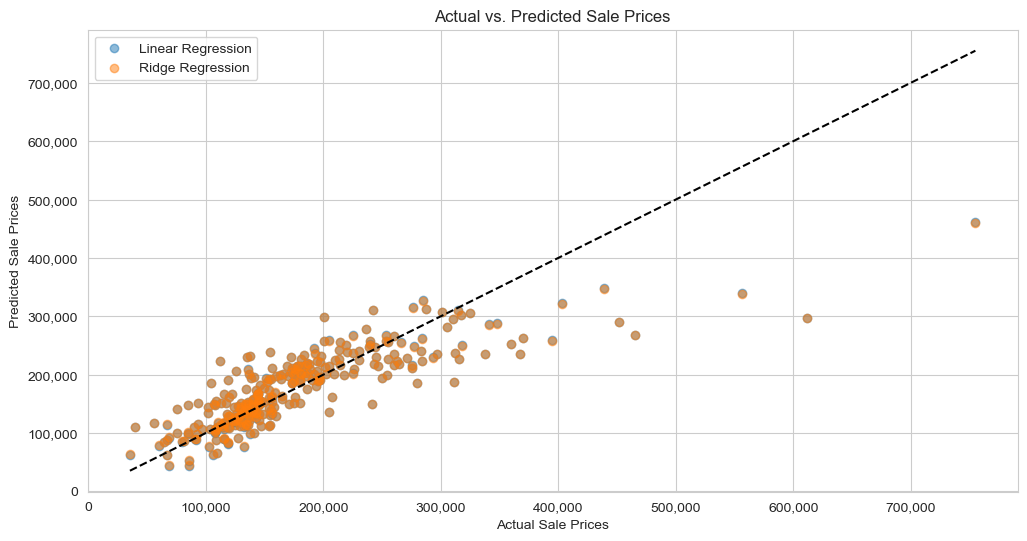

In [18]:
plt.figure(figsize=(12, 6))

# Actual vs Linear Regression Predictions
plt.scatter(y_test, LR_predictions, alpha=0.5, label='Linear Regression')

# Actual vs Ridge Regression Predictions
plt.scatter(y_test, RR_predictions, alpha=0.5, label='Ridge Regression')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs. Predicted Sale Prices')
plt.legend()
# Format the x-axis labels to include commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
# Format the y-axis labels to include commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

According to this scatterplot, both models seem to be performing reasonably well since many data points cluster around the diagonal line, indicating that predicted Sale Prices are close to actual prices. There is a visible spread of points away from the diagonal as the actual sale prices increase, suggesting that both models tend to have more predictive error with higher-valued homes. These outliers might be cases with special characteristics not well captured by the models or could be extreme values that could potentially be influential points or leverage points in the regression analysis. For the most expensive homes (on the far right of the plot), there seems to be a tendency for the models to underestimate the actual Sale Prices, as many points are below the line.

<font size="4">12. Repeat the Regression Analysis. Now Using A Broader Set of Features.

- First, let's **drop** the following variables using the ```data.drop``` method from the Pandas library:

```axis = 1``` indicates that the method should operate along the columns. In Pandas, axis = 0 is for rows and axis = 1 is for columns.

```inplace = True``` means that the original DataFrame data should be modified in place. Without ```inplace = True```, the drop method would return a new DataFrame with the specified columns removed, and the original DataFrame would remain unchanged.

In [19]:
data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)

<font size="4"> - Next, let's check what variables contain missing values: 

In [20]:
missing_data_summary = data.isnull().sum()
missing_data_only = missing_data_summary[missing_data_summary > 0]
missing_data_only

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

<font size="4">- Next, let's remove them for simplicity, and check how many observations and columns are left in our dataset:

In [21]:
cleaned_data = data.dropna()

num_observations, num_columns = cleaned_data.shape
print(f"Number of observations: {num_observations}")
print(f"Number of columns: {num_columns}")

Number of observations: 1338
Number of columns: 74


<font size="4">- Next, let's partition the resulting data into training and test sets as previously:

In [22]:
X = cleaned_data.drop(['Id', 'SalePrice'], axis=1)
y = cleaned_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size="4">- Next, let's separate the column names contained in the Pandas DataFrame ```X_train``` into two lists: one for numerical columns and one for categorical columns:

```select_dtypes(include=['int64', 'float64'])``` is a Pandas DataFrame method that selects columns whose data type is either int64 or float64, which are generally used for representing numerical data.

```select_dtypes(include=['object'])``` is similar to the previous one but this one selects columns of the data type object. Columns of this type often contain strings and are typically treated as categorical data in a Pandas DataFrame.

In [23]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

<font size="4">- Next, let's preprocess our data by configuring a ```ColumnTransformer``` object from ```scikit-learn```, which is a feature transformer for heterogeneous data. It applies different transformations to columns of arrays or pandas DataFrames.

In the following Python code snippet, ```transformers``` is a list of tuples where each tuple contains:

1. The name of the transformer (e.g., 'num' for numerical columns, 'cat' for categorical columns).
2. The transformer object itself (e.g., ```StandardScaler()``` for standardizing numerical features, ```OneHotEncoder(handle_unknown='ignore')``` for encoding categorical features).
3. The column names or indices to which the transformer should be applied (numerical_cols for numerical columns and categorical_cols for categorical columns).

The tuple ```('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)``` specifies that the OneHotEncoder should be applied to the columns in categorical_cols. The ```handle_unknown='ignore'``` parameter tells the encoder to ignore categories that were not seen during fit.

```OneHotEncoder```  is a class from scikit-learn that is used to convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. For a categorical variable with n categories (or levels), the ```OneHotEncoder``` transforms it into n binary variables, also known as dummy variables. Each binary variable represents one category and has a value of 1 if the category is present and 0 otherwise.

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

<font size="4">- Using the pre-processed training data, let's fit the pipeline for the ridge regression with k-fold cross-validation, obtain the optimal lambda (alpha) and fit the ridge regression model:

In [25]:
alpha_space = np.logspace(-4, 4, 50)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridgecv', RidgeCV(alphas=alpha_space, cv=kf))
])

ridge_pipeline.fit(X_train, y_train)
optimal_alpha = ridge_pipeline.named_steps['ridgecv'].alpha_
print(f"Ridge Regression: Optimal lambda (alpha): {optimal_alpha}")

Ridge Regression: Optimal lambda (alpha): 11.513953993264458


<font size="4">- Next, let's identify the alpha value that minimizes the cross-validated MSE

The code below plots the relationship between alpha values and their corresponding MSE scores on a log scale for alpha. It highlights the optimal alpha value with a vertical red dashed line, which presumably is defined earlier in the code based on the alpha that resulted in the lowest MSE.

For each alpha, the algorithm performs K-fold cross-validation (using the KFold object kf) on the training data. It evaluates the model using the negative mean squared error (MSE) scoring method. The mean of these scores is then appended to the scores list. The use of negative MSE is due to cross_val_score convention, where a higher score represents a better model, but traditionally, with MSE, lower is better. Since the scores were calculated as negative MSE for compatibility with ```cross_val_score```'s convention, they're converted back to positive values for interpretation and plotting.

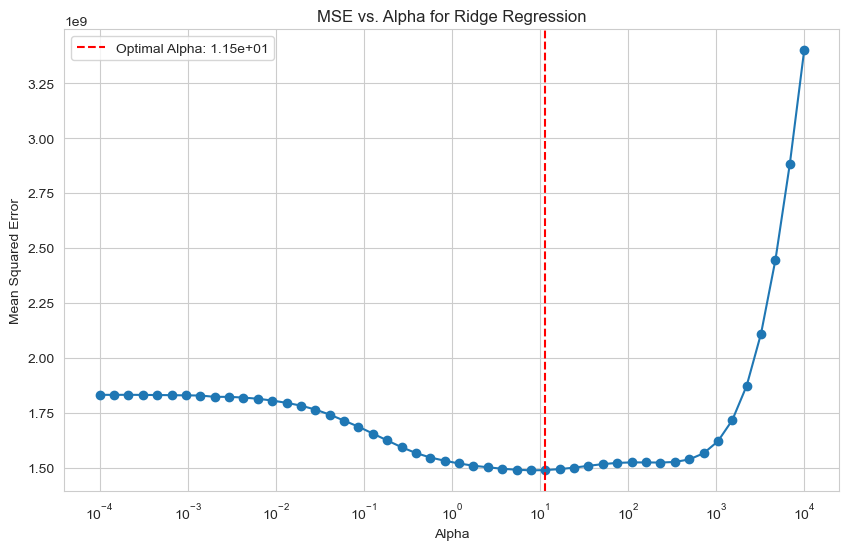

In [26]:
alphas = np.logspace(-4, 4, 50)
scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('ridge', ridge)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    scores.append(np.mean(cv_scores))

# Convert scores to positive MSE
scores = np.abs(scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha for Ridge Regression')
plt.axvline(x=optimal_alpha, color='red', linestyle='--', label=f'Optimal Alpha: {optimal_alpha:.2e}')
plt.legend()
plt.show()

The fact that the optimal lambda (alpha) value is the same by using two features before and 74 features now is surprising but possible. This outcome can occur due to several reasons, reflecting the nature of the dataset, the specific features involved, and the behavior of regularization. One possible reason, which could be here, is that the two features 'GrLivArea' and 'YearBuilt' could be dominant in terms of explaining the variance in the target variable. So, adding more features might not significantly change the model's performance. Thus, the regularization strength that works best for the two-feature model might also be optimal when more features are included.

<font size="4">- Now, let's set the pipeline for the linear regression model that will be estimated via OLS, and fit the model:

In [27]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbv...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linear', LinearRegression())])

<font size="4">- Let's Calculate Predicted House Prices for both Models:

In [28]:
RR_predictions = ridge_pipeline.predict(X_test)
LR_predictions = lr_pipeline.predict(X_test)

Notice that when computing predictions using ```ridge_pipeline.predict(X_test)``` and ```lr_pipeline.predict(X_test)```, we don't need to manually distinguish between numerical_cols and categorical_cols for X_test because the pipelines handle this internally, thanks to how they were constructed with a ColumnTransformer. In summary, the automatic handling of column-specific transformations within pipelines, facilitated by ColumnTransformer, obviates the need to manually distinguish between numerical and categorical columns when making predictions, ensuring accuracy and efficiency in data processing.

<font size="4">- Finally, let's calculate the numerical performance metrics:

In [29]:
# Calculate metrics for Linear Regression
mse_lr = mean_squared_error(y_test, LR_predictions)
mae_lr = mean_absolute_error(y_test, LR_predictions)
r2_lr = r2_score(y_test, LR_predictions)

# Calculate metrics for Ridge Regression 
mse_rr = mean_squared_error(y_test, RR_predictions)
mae_rr = mean_absolute_error(y_test, RR_predictions)
r2_rr = r2_score(y_test, RR_predictions)

# Print comparison
print("Linear Regression vs Ridge Regression")
print(f"Mean Squared Error: {mse_lr} (LR) vs {mse_rr} (RR)")
print(f"Mean Absolute Error: {mae_lr} (LR) vs {mae_rr} (RR)")
print(f"R^2 Score: {r2_lr} (LR) vs {r2_rr} (RR)")

Linear Regression vs Ridge Regression
Mean Squared Error: 629278333.6585912 (LR) vs 686705260.419381 (RR)
Mean Absolute Error: 17139.131897653868 (LR) vs 17603.455693874843 (RR)
R^2 Score: 0.8529416348629574 (LR) vs 0.8395213254186658 (RR)


According to all three metrics, the Linear Regression estimated via OLS clearly outperforms the Ridge Regression model in this instance.